In [28]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
from glob import glob

In [29]:
#Reference the file where the CSV is located
poverty_path= "../Resources/poverty_stats.csv"

#Import the data into a pandas DataFrame
poverty_df=pd.read_csv(poverty_path, encoding= "UTF-8")
poverty_df

,Year,State FIPS,Postal Code,Name,Poverty Estimate All Ages,90% CI Lower Bound,90% CI Upper Bound,Poverty Percent All Ages,90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,Poverty Estimate Ages 0-4,90% CI Lower Bound.7,90% CI Upper Bound.7,Poverty Percent Ages 0-4,90% CI Lower Bound.8,90% CI Upper Bound.8
0,2003,0,US,United States,"35,861,170","35,190,401","36,531,939",12.5,12.2,12.7,...,16.6,"43,318","43,009","43,627","4,021,366","3,817,517","4,225,215",20.3,19.3,21.4
1,2003,1,AL,Alabama,"677,455","644,647","710,263",15.3,14.5,16.0,...,22.5,"36,131","34,659","37,602","72,477","62,361","82,594",24.7,21.3,28.2
2,2003,2,AK,Alaska,"63,126","58,920","67,332",9.8,9.2,10.5,...,12.0,"52,391","50,764","54,018","7,651","6,153","9,148",15.6,12.5,18.6
3,2003,4,AZ,Arizona,"783,005","736,508","829,502",13.9,13.1,14.7,...,21.8,"41,963","40,557","43,368","92,147","75,773","108,522",20.9,17.2,24.7
4,2003,5,AR,Arkansas,"432,240","410,707","453,774",16.0,15.2,16.8,...,23.4,"33,445","31,994","34,895","49,523","42,786","56,260",27.2,23.5,30.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2020,51,VA,Virginia,"769,479","747,641","791,317",9.2,8.9,9.5,...,12.0,"79,154","78,336","79,972","67,255","61,585","72,925",13.7,12.5,14.9
932,2020,53,WA,Washington,"714,653","692,072","737,234",9.5,9.2,9.8,...,10.9,"80,319","79,334","81,304","53,387","47,813","58,961",12.2,10.9,13.5
933,2020,54,WV,West Virginia,"274,176","264,703","283,649",15.8,15.3,16.3,...,20.2,"49,202","48,077","50,327","19,960","18,165","21,755",22.8,20.7,24.9
934,2020,55,WI,Wisconsin,"571,049","554,353","587,745",10.0,9.7,10.3,...,12.1,"64,901","64,276","65,526","45,185","41,504","48,866",14.2,13.0,15.4


In [30]:
poverty_df.columns

Index(['Year', 'State FIPS', 'Postal Code', 'Name',
       'Poverty Estimate All Ages', '90% CI Lower Bound', '90% CI Upper Bound',
       'Poverty Percent All Ages', '90% CI Lower Bound.1',
       '90% CI Upper Bound.1', 'Poverty Estimate Ages 0-17',
       '90% CI Lower Bound.2', '90% CI Upper Bound.2',
       'Poverty Percent Ages 0-17', '90% CI Lower Bound.3',
       '90% CI Upper Bound.3', 'Poverty Estimate Ages 5-17',
       '90% CI Lower Bound.4', '90% CI Upper Bound.4',
       'Poverty Percent Ages 5-17', '90% CI Lower Bound.5',
       '90% CI Upper Bound.5', 'Median Household Income',
       '90% CI Lower Bound.6', '90% CI Upper Bound.6',
       'Poverty Estimate Ages 0-4', '90% CI Lower Bound.7',
       '90% CI Upper Bound.7', 'Poverty Percent Ages 0-4',
       '90% CI Lower Bound.8', '90% CI Upper Bound.8'],
      dtype='object')

In [31]:
reduced_poverty_df=poverty_df.loc[:, ["Year", "State FIPS", "Postal Code", "Name","Poverty Percent All Ages", 
                                      "Median Household Income","Poverty Estimate Ages 5-17", "Poverty Percent Ages 5-17",
                                     ]]
reduced_poverty_df.head()

,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
1,2003,1,AL,Alabama,15.3,"36,131","165,578",21.0
2,2003,2,AK,Alaska,9.8,"52,391","14,330",10.7
3,2003,4,AZ,Arizona,13.9,"41,963","213,295",19.8
4,2003,5,AR,Arkansas,16.0,"33,445","105,100",21.7


In [32]:
reduced_poverty_df=reduced_poverty_df.loc[(reduced_poverty_df["State FIPS"]==0)]
reduced_poverty_df.head()

,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
52,2004,0,US,United States,12.7,"44,334","8,430,886",16.2
104,2005,0,US,United States,13.3,46242,8765541,17.0
156,2006,0,US,United States,13.3,48451,8700048,16.7
208,2007,0,US,United States,13.0,50740,8499844,16.4


In [33]:
national_stats=reduced_poverty_df[reduced_poverty_df["State FIPS"]==0]
national_stats.head()


,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
52,2004,0,US,United States,12.7,"44,334","8,430,886",16.2
104,2005,0,US,United States,13.3,46242,8765541,17.0
156,2006,0,US,United States,13.3,48451,8700048,16.7
208,2007,0,US,United States,13.0,50740,8499844,16.4


In [34]:
clean_data=poverty_df[~poverty_df["State FIPS"].isin(national_stats["State FIPS"])]
clean_data

,Year,State FIPS,Postal Code,Name,Poverty Estimate All Ages,90% CI Lower Bound,90% CI Upper Bound,Poverty Percent All Ages,90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,Poverty Estimate Ages 0-4,90% CI Lower Bound.7,90% CI Upper Bound.7,Poverty Percent Ages 0-4,90% CI Lower Bound.8,90% CI Upper Bound.8
1,2003,1,AL,Alabama,"677,455","644,647","710,263",15.3,14.5,16.0,...,22.5,"36,131","34,659","37,602","72,477","62,361","82,594",24.7,21.3,28.2
2,2003,2,AK,Alaska,"63,126","58,920","67,332",9.8,9.2,10.5,...,12.0,"52,391","50,764","54,018","7,651","6,153","9,148",15.6,12.5,18.6
3,2003,4,AZ,Arizona,"783,005","736,508","829,502",13.9,13.1,14.7,...,21.8,"41,963","40,557","43,368","92,147","75,773","108,522",20.9,17.2,24.7
4,2003,5,AR,Arkansas,"432,240","410,707","453,774",16.0,15.2,16.8,...,23.4,"33,445","31,994","34,895","49,523","42,786","56,260",27.2,23.5,30.9
5,2003,6,CA,California,"4,836,106","4,639,930","5,032,283",13.7,13.2,14.3,...,20.1,"48,440","47,147","49,734","520,311","461,424","579,197",20.0,17.8,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2020,51,VA,Virginia,"769,479","747,641","791,317",9.2,8.9,9.5,...,12.0,"79,154","78,336","79,972","67,255","61,585","72,925",13.7,12.5,14.9
932,2020,53,WA,Washington,"714,653","692,072","737,234",9.5,9.2,9.8,...,10.9,"80,319","79,334","81,304","53,387","47,813","58,961",12.2,10.9,13.5
933,2020,54,WV,West Virginia,"274,176","264,703","283,649",15.8,15.3,16.3,...,20.2,"49,202","48,077","50,327","19,960","18,165","21,755",22.8,20.7,24.9
934,2020,55,WI,Wisconsin,"571,049","554,353","587,745",10.0,9.7,10.3,...,12.1,"64,901","64,276","65,526","45,185","41,504","48,866",14.2,13.0,15.4


In [35]:
reduced_poverty_df

,Year,State FIPS,Postal Code,Name,Poverty Percent All Ages,Median Household Income,Poverty Estimate Ages 5-17,Poverty Percent Ages 5-17
0,2003,0,US,United States,12.5,"43,318","8,399,573",16.1
52,2004,0,US,United States,12.7,"44,334","8,430,886",16.2
104,2005,0,US,United States,13.3,46242,8765541,17.0
156,2006,0,US,United States,13.3,48451,8700048,16.7
208,2007,0,US,United States,13.0,50740,8499844,16.4
260,2008,0,US,United States,13.2,52029,8549526,16.5
312,2009,0,US,United States,14.3,50221,9509142,18.2
364,2010,0,US,United States,15.3,"50,046","10,484,513",19.8
416,2011,0,US,United States,15.9,"50,502","10,976,987",20.8
468,2012,0,US,United States,15.9,"51,371","11,086,537",21.0


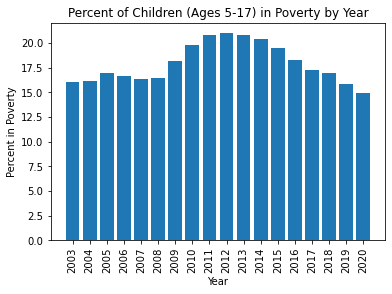

In [39]:
# counts=reduced_poverty_df["Poverty Percent Ages 5-17"].values()
x_values = reduced_poverty_df["Year"]
y_values=reduced_poverty_df["Poverty Percent Ages 5-17"]
labels=["2003","2004","2005","2006","2007","2008","2009","2010",
        "2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
plt.bar(x_values, y_values)
plt.xlabel("Year")
plt.xticks(x_values, labels, rotation='vertical')
plt.ylabel("Percent in Poverty")
plt.title("Percent of Children (Ages 5-17) in Poverty by Year")
plt.show()

-The bar graph above shows that the year 2012 had the highest percent in poverty wtihin the age group of 5-17 year olds across the United States. 

In [ ]:
#Create a Bar Graph for the years 2005, 2010, 2015, 2020

In [ ]:
#Merge with obesity csv (clean DataFrame) to compare poverty rates and obesity rates